### Exploring the possibility of building a minimally viable product (MVP) model to predict the outcome of a restaurant’s next inspection- By Desmond Delali Offei

### PROJECT OUTLINE

The outline of the project is as follows:
1. Introduction
2. Data Cleaning and Manipulation
3. Exploratory Data Analysis(EDA)
4. Building Models
5. Summary
6. Conclusion
7. Recommendations
8. References

## INTRODUCTION

#### Background

The food inspection department plays a major role  in safeguarding foood consumed by all individuals accross the United States since food is easily contaminated if safety practices are not maintained. Also, with the surge of salmonella and food-borne disease outbreaks, food served out of restaurants needs to be especially taken care of to make sure people are not “buying” diseases. Thus, the need for food safety inspection.

During such inspections, food safety inspectors randomly visits restaurants to ensure all safety measures are being followed. Each restaurant is given a letter grade after inspection with an A grade been a good score. A restaurant with a grade of C or below is deemed to have violated a lot of safety regulations. In some cases such restaurants may be shut down or made to pay a fine after correcting those violations. Good food inspection grades are also very important to restaurants because it leads to a boost in customer confidence in the food being served. Also, since restaurant food inspection grades are public record, a low food inspection grade may lead to low customer turn out.

Therefore, it would be crucial for restaurant or safety inspectors to be able to predict the next inspection grade of a restaurant or to be able to predict if a restaurant would have a poor inspection grade or not.

In this report, I would like to predict whether or not a restaurant would get an inspection grade of c or lower in their next inspection based on their previous inspection information.

#### Data

The data to be used for this analysis is a modified version of the restaurant inspection records of the City of of Las vegas. For the purpose of this exercise, I would be limiting my analysis to only the data from the state of Nevada.

Also, I am assuming that a " 1" is for a next_inspection grade_ c or below means the restaurant had a grade C, D or lower grade in their next inspection and a 0 for a restaurant which had a grade of A or B in their next inspection.

#### Objective of the Study

The goal of this study is to:

1. Identify the variables that are most important in determining whether a restaurant will receive a next inspection grade c or below.
2. Obtain the best predictive model to determine whether a restaurant will receive a next inspection grade c or below.
3. Get predictions for testing our  data.

#### Methodology

For this analysis i would be fitting various classification models since our study has a binary response. The models i will be fitting are  logistic regression, KNN, decision tree , random forest and ANN.

The metrics I would be using to evaluate and compare my models are Accuracy, sensitivity, F-Score and precision.

The Accuracy of a classifiation model is the percentage of correct predictions for a given data.

Sensitivity is the metric that measures the ability of the model to predict the true positive values in your response. Its the rate of the true positives in the predictions.

In this analysis, the sensitivity would be the models ability to correctly predict whether the restaurant would have a next inspection grade of c or below.

### DATA CLEANING AND MANIPULATION

In [ ]:
We start by loading in our dataset and  prepocessing  using steps below:

In [249]:
#loading libraries
import pandas as pd #to load and manipulate data
import numpy as np #data manipulation 
import matplotlib.pyplot as plt # drawing graphs
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix, f1_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score

pd.set_option('max_columns', None)

from sklearn.metrics import ConfusionMatrixDisplay

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

import warnings
warnings.filterwarnings("ignore")

In [88]:
#loading dataset
dataset = pd.read_csv('/Users/desmondoffei/Desktop/Nationwide/data/TRAIN_SET_2022.csv')

#quickly view the first few rows of the dataset
dataset.head(5)

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Snack Bar,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,A,25.0,27.95998269,13.004886,11/5/2013 16:15,Routine Inspection,11,"2,042,153,022,955",1/6/2015 16:34,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,A,7.0,27.71936533,3.922086,9/21/2012 13:00,Routine Inspection,9,"214,216,229,230,233",2/21/2013 22:26,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5,0
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,A,23.0,26.44263674,10.312777,9/16/2011 11:50,Routine Inspection,9,"202,215,233",4/6/2015 9:00,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3,1
3,DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,A,14.0,33.98829267,4.163975,11/22/2011 11:40,Routine Inspection,5,"214,230,233",2/21/2013 22:26,"(36.183669, 115.112355)",214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0
4,DA1031041,PR0006084,HARD ROCK JOINT EAST SVC BAR FL 1,HARD ROCK HOTEL & CASINO,Bar / Tavern,4455 S Paradise Rd,Las Vegas,Nevada,89169-6574,0.0,A,10.0,21.98028217,13.462786,11/9/2012 20:30,Routine Inspection,5,"214,230,233",2/21/2013 22:26,"(36.1100828, 115.1538714)",214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0


In [89]:
#Get the number of rows and columns of dataset
dataset.shape

(15673, 28)

In [8]:
#check for duplicate records
dataset.duplicated().sum()

0

In [90]:
dataset.dtypes

RESTAURANT_SERIAL_NUMBER             object
RESTAURANT_PERMIT_NUMBER             object
RESTAURANT_NAME                      object
RESTAURANT_LOCATION                  object
RESTAURANT_CATEGORY                  object
ADDRESS                              object
CITY                                 object
STATE                                object
ZIP                                  object
CURRENT_DEMERITS                    float64
CURRENT_GRADE                        object
EMPLOYEE_COUNT                      float64
MEDIAN_EMPLOYEE_AGE                  object
MEDIAN_EMPLOYEE_TENURE              float64
INSPECTION_TIME                      object
INSPECTION_TYPE                      object
INSPECTION_DEMERITS                  object
VIOLATIONS_RAW                       object
RECORD_UPDATED                       object
LAT_LONG_RAW                         object
FIRST_VIOLATION                     float64
SECOND_VIOLATION                    float64
THIRD_VIOLATION                 

In [91]:
#checking missing values
dataset.isnull().sum()

RESTAURANT_SERIAL_NUMBER              0
RESTAURANT_PERMIT_NUMBER              0
RESTAURANT_NAME                      65
RESTAURANT_LOCATION                 200
RESTAURANT_CATEGORY                 130
ADDRESS                              70
CITY                                236
STATE                               209
ZIP                                  59
CURRENT_DEMERITS                    216
CURRENT_GRADE                       305
EMPLOYEE_COUNT                       93
MEDIAN_EMPLOYEE_AGE                  34
MEDIAN_EMPLOYEE_TENURE              297
INSPECTION_TIME                     183
INSPECTION_TYPE                     221
INSPECTION_DEMERITS                 254
VIOLATIONS_RAW                      165
RECORD_UPDATED                      119
LAT_LONG_RAW                         15
FIRST_VIOLATION                     212
SECOND_VIOLATION                     85
THIRD_VIOLATION                      61
FIRST_VIOLATION_TYPE                146
SECOND_VIOLATION_TYPE               267


In [ ]:
#Summary  statistics of variables

In [4]:
#Summary statistics for categorical variables
dataset.describe(exclude=['object'])

,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_TENURE,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION
count,15457.000000,15580.000000,15376.000000,1.546100e+04,15588.000000,15612.000000
mean,5.239552,22.289345,4.030491,7.263423e+02,171.871953,179.269088
std,13.895923,892.830909,2.022737,6.976831e+04,80.079188,77.347049
min,-8.000000,-7.000000,0.227197,1.000000e+00,2.000000,4.000000
25%,0.000000,8.000000,2.551504,2.020000e+02,204.000000,209.000000
50%,5.000000,14.000000,3.693207,2.060000e+02,211.000000,215.000000
75%,8.000000,21.000000,5.138718,2.110000e+02,215.000000,227.000000
max,1214.000000,111447.000000,24.399347,8.675309e+06,302.000000,310.000000


In [5]:
#Summary statistics for categorical variables
dataset.describe(include='object')

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_GRADE,...,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
count,15673,15673,15608,15473,15543,15603,15437,15464,15614,15368,...,15452,15419,15508,15554,15658,15527,15406,15500,15504,15633
unique,15673,8654,8317,4963,34,4784,30,20,2483,23,...,12,73,11397,4941,4718,14,10,12,27,8
top,DA1117270,PR0012160,Robertos Taco Shop,CAESARS PALACE HOTEL & CASINO,Restaurant,3400 S Las Vegas Blvd,Las Vegas,Nevada,89109,A,...,Routine Inspection,10,"214,230,233",2/21/2013 22:26,"(36.1161559, 115.1750576)",Critical,Major,Major,3,0
freq,1,12,98,114,9316,138,12350,15404,446,14795,...,14564,1907,67,10145,125,7169,7907,7303,3718,12947


In [4]:
#checking for unique values in each column

In [67]:
dataset.nunique()

RESTAURANT_CATEGORY                    31
CITY                                   22
CURRENT_DEMERITS                       45
CURRENT_GRADE                           6
EMPLOYEE_COUNT                         49
MEDIAN_EMPLOYEE_AGE                 15139
MEDIAN_EMPLOYEE_TENURE              15223
INSPECTION_TIME                     14132
INSPECTION_TYPE                         2
INSPECTION_DEMERITS                    66
RECORD_UPDATED                       4892
FIRST_VIOLATION                        68
SECOND_VIOLATION                       73
THIRD_VIOLATION                        80
FIRST_VIOLATION_TYPE                    4
SECOND_VIOLATION_TYPE                   4
THIRD_VIOLATION_TYPE                    4
NUMBER_OF_VIOLATIONS                   26
NEXT_INSPECTION_GRADE_C_OR_BELOW        2
inspection_hours                        2
dtype: int64

In [ ]:
#Comments on above

There are 15673 observations (rows) and 28 variables (columns) in the dataset

The data has a lot of missing values.


Some of the variables seems to be observation identifiers rather than variables to be considered in prediction. For instance serial number, permit number among others. Hence, those will be removed during data cleaning.


We have other states other than Nevada. All other states would have to be removed since i am assuming the state of interest is Nevada

Some of the categorical variables have more levels than expected and some of the levels do not make sense for the data. So we would need to clean up the factor levels.


Furthermore some numeric variables have been assigned as factors for instance, NUMBER_OF_VIOLATIONS because they included some strings and random symbols. Hence, those would have to be cleaned up and changed to numeric.


Comparing the first violation, second violation and third violation to the violation raw variable. I can infer that these are the specific violations and they have been mapped to the FIRST_VIOLATION_TYPE, SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE which are more informative to the response in this case. Hence, I would be dropping the first violation, second violation, third violation, violation raw variable during data cleaning.



Next we take a close look at the categorical variables levels and counts to clean it and determine possible outliers and 
wrong categories assigned by counting the unique values in each feature.

#### STATE

First of all crucial we make sure we are dealing with only data related to the Nevada state so we start  from there

In [93]:

dataset['STATE'].value_counts(dropna=False)

Nevada        15404
NaN             209
Baymax           14
Neelix           10
New York          9
SK                8
Capybara          5
Disrepair         1
Nevada!           1
NEVADA            1
NeVaDa            1
TT                1
Florida           1
NVVVVVV           1
Navada            1
Montana           1
New Mexico        1
Washington        1
Nelvana           1
Star Trek         1
Nevada?           1
Name: STATE, dtype: int64

In [7]:
dataset.shape

(15673, 28)

In [94]:
#delete states not nevada 
dataset = dataset.drop(dataset[(dataset.STATE !="Nevada") & (dataset.STATE !="Nevada!") & 
                              (dataset.STATE !="NEVADA") &
                              (dataset.STATE !="NeVaDa") & 
                              (dataset.STATE !="Nevada?") & 
                               (dataset.STATE !="Navada?") & ~pd.isna(dataset.STATE)].index) 

In [95]:
dataset['STATE'].value_counts(dropna=False)

Nevada     15404
NaN          209
NeVaDa         1
NEVADA         1
Nevada!        1
Nevada?        1
Name: STATE, dtype: int64

In [41]:
dataset.shape

(15616, 28)

In [ ]:
# 57 records were deleted (15616 records are remaining) 

##### REMOVE IRRELEVANT FEATURES

Some of these variables are identifiers (e.g.RESTAURANT_PERMIT_NUMBER, RESTAURANT_NAME etc) 

Hence we remove Serial Number, ZIP , CITY, INSPECTION TIME, RECORD UPDATED, VIOLATIONS,RESTAURANT_NAME, RESTAURANT_LOCATION,LAT_LONG_RAW, RECORD_UPDATED,RESTAURANT_PERMIT_NUMBER because are mostly identifiers and does not seem to be relevant in predicting the response.

## I am going to assume that the particular violation is not as important as the sevearity of the  violation( violation type). Hence, I am going to remove the variables that gives the exact violations in the data

Other variables such as city wouldd be dropped after exploratory data analysis

In [ ]:
#drop unrelated categories, #now lets take out categories not needed to prevent bloating

In [96]:
dataset.drop([ 'RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER', 'RESTAURANT_NAME', 'RESTAURANT_LOCATION', 
              'ADDRESS', 'STATE', 'ZIP', 'LAT_LONG_RAW', 'FIRST_VIOLATION',
       'SECOND_VIOLATION', 'THIRD_VIOLATION', "VIOLATIONS_RAW" , "RECORD_UPDATED"], axis=1, inplace=True)

In [97]:
dataset.head()

,RESTAURANT_CATEGORY,CITY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,Snack Bar,Las Vegas,0.0,A,25.0,27.95998269,13.004886,11/5/2013 16:15,Routine Inspection,11,Critical,Major,Imminent Health Hazard,4,0
1,Restaurant,Las Vegas,3.0,A,7.0,27.71936533,3.922086,9/21/2012 13:00,Routine Inspection,9,Major,Major,Non-Major,5,0
2,Restaurant,Las Vegas,8.0,A,23.0,26.44263674,10.312777,9/16/2011 11:50,Routine Inspection,9,Critical,Major,Non-Major,3,1
3,Elementary School Kitchen,Las Vegas,0.0,A,14.0,33.98829267,4.163975,11/22/2011 11:40,Routine Inspection,5,Major,Non-Major,Non-Major,3,0
4,Bar / Tavern,Las Vegas,0.0,A,10.0,21.98028217,13.462786,11/9/2012 20:30,Routine Inspection,5,Major,Non-Major,Non-Major,NaN,0


#### NEXT_INSPECTION_GRADE_C_OR_BELOW

In [257]:
dataset['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts(dropna=False)

0       12910
1        2664
NaN        40
-3          1
Goat        1
7           1
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: int64

we delete other 3 records apart from 0 and 1. In addition we also drop the NA values of the response since they are few (40).

In [98]:
dataset = dataset.drop(dataset[(dataset.NEXT_INSPECTION_GRADE_C_OR_BELOW !="0") & (dataset.NEXT_INSPECTION_GRADE_C_OR_BELOW !="1")].index) 

In [99]:
dataset['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts(dropna=False)

0    12910
1     2664
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: int64

#### VIOLATION TYPES

These columns shd have 4 categories Critical, Major, Non-Major, Imminent Health Hazard others outliers
we get rid of other categories aside that

In [100]:
dataset['FIRST_VIOLATION_TYPE'].value_counts(dropna=False)

Critical                             7127
Major                                6693
Non-Major                            1579
NaN                                   146
Supercalifragilisticexpialidocius      11
Kritical                               10
Not Critical Enough                     4
Imminent Health Hazard                  3
Bullwinkle                              1
Name: FIRST_VIOLATION_TYPE, dtype: int64

In [101]:
dataset['SECOND_VIOLATION_TYPE'].value_counts(dropna=False)

Major                     7856
Non-Major                 4478
Critical                  2960
NaN                        265
Imminent Health Hazard       5
Kritical                     5
I have no idea               2
Supercritical                1
Not Critical Enough          1
Kitchen Nightmares           1
Name: SECOND_VIOLATION_TYPE, dtype: int64

In [262]:
dataset['THIRD_VIOLATION_TYPE'].value_counts(dropna=False)

Major                        7256
Non-Major                    7230
Critical                      859
NaN                           172
Imminent Health Hazard         37
Non-MaJoRNonMajorNonmajor       7
Whoa                            6
Kritical                        3
Not Critical Enough             1
789wre                          1
Down Yonder                     1
Banana                          1
Name: THIRD_VIOLATION_TYPE, dtype: int64

In [263]:

dataset['FIRST_VIOLATION_TYPE'] = dataset['FIRST_VIOLATION_TYPE'].replace(['Kritical'], 
                                                            ['Critical'])

dataset = dataset.drop(dataset[(dataset.FIRST_VIOLATION_TYPE !="Critical") & 
                               (dataset.FIRST_VIOLATION_TYPE !="Major") & 
                              (dataset.FIRST_VIOLATION_TYPE !="Non-Major") &
                              (dataset.FIRST_VIOLATION_TYPE !="Imminent Health Hazard") & ~pd.isna(dataset.FIRST_VIOLATION_TYPE)].index) 

In [264]:

dataset['SECOND_VIOLATION_TYPE'] = dataset['SECOND_VIOLATION_TYPE'].replace(['Kritical', 'Supercritical'], 
                                                            ['Critical', "Imminent Health Hazard"])


dataset = dataset.drop(dataset[(dataset.SECOND_VIOLATION_TYPE !="Critical") & 
                               (dataset.SECOND_VIOLATION_TYPE !="Major") & 
                              (dataset.SECOND_VIOLATION_TYPE !="Non-Major") &
                              (dataset.SECOND_VIOLATION_TYPE !="Imminent Health Hazard") & ~pd.isna(dataset.SECOND_VIOLATION_TYPE)].index) 

In [265]:

dataset['THIRD_VIOLATION_TYPE'] = dataset['THIRD_VIOLATION_TYPE'].replace(['Kritical', 'Supercritical', 'Non-MaJoRNonMajorNonmajor'], 
                                                            ['Critical', "Imminent Health Hazard", 'Non-Major'])


dataset = dataset.drop(dataset[(dataset.THIRD_VIOLATION_TYPE !="Critical") & 
                               (dataset.THIRD_VIOLATION_TYPE !="Major") & 
                              (dataset.THIRD_VIOLATION_TYPE !="Non-Major") &
                              (dataset.THIRD_VIOLATION_TYPE !="Imminent Health Hazard") & ~pd.isna(dataset.THIRD_VIOLATION_TYPE)].index) 

In [266]:
dataset['FIRST_VIOLATION_TYPE'].value_counts(dropna=False)

Critical                  7129
Major                     6689
Non-Major                 1578
NaN                        146
Imminent Health Hazard       3
Name: FIRST_VIOLATION_TYPE, dtype: int64

In [267]:
dataset['SECOND_VIOLATION_TYPE'].value_counts(dropna=False)

Major                     7842
Non-Major                 4477
Critical                  2956
NaN                        264
Imminent Health Hazard       6
Name: SECOND_VIOLATION_TYPE, dtype: int64

In [268]:
dataset['THIRD_VIOLATION_TYPE'].value_counts(dropna=False)

Major                     7244
Non-Major                 7233
Critical                   860
NaN                        171
Imminent Health Hazard      37
Name: THIRD_VIOLATION_TYPE, dtype: int64

#### CURRENT_GRADE

In [269]:
dataset['CURRENT_GRADE'].value_counts(dropna=False)

A             14687
NaN             301
B               257
C               172
X                75
O                31
N                13
Ayyyyyyy          1
AA                1
AAA               1
AQAAAAA           1
Cc                1
CC                1
C+                1
7                 1
.\<><1@#&|        1
Name: CURRENT_GRADE, dtype: int64

In [198]:
#delete other miscellaneous categories and correctly add typing errors classes to correct category

In [270]:

dataset['CURRENT_GRADE'] = dataset['CURRENT_GRADE'].replace(['Ayyyyyyy', 'AA', 'AAA', 'AQAAAAA'], ['A', 'A', 'A', 'A'])

dataset['CURRENT_GRADE'] = dataset['CURRENT_GRADE'].replace(['Cc', 'CC', 'C+'], ['C', 'C', 'C'])
s
dataset = dataset.drop(dataset[(dataset.CURRENT_GRADE == "7") | 
                               (dataset.CURRENT_GRADE == ".\<><1@#&|")].index) 

In [271]:
dataset['CURRENT_GRADE'].value_counts(dropna=False)

A      14691
NaN      301
B        257
C        175
X         75
O         31
N         13
Name: CURRENT_GRADE, dtype: int64

#### INSPECTION_TYPE

In [272]:
dataset['INSPECTION_TYPE'].value_counts(dropna=False)

Routine Inspection                      14447
Re-inspection                             860
NaN                                       218
Kitchen Nightmares                          9
Good Times                                  3
Bear Inspection                             2
Kitchen Nightmares (UK)                     1
Re-re-re-re-re-inspection                   1
Routine Inspection by Cat                   1
San Dimas High School Football Rules        1
Name: INSPECTION_TYPE, dtype: int64

In [ ]:
#correctly add typing errors classes to correct category

In [273]:
dataset['INSPECTION_TYPE'] = dataset['INSPECTION_TYPE'].replace(['Re-re-re-re-re-inspection', 
                                                                 'Routine Inspection by Cat'],
                                                                ['Re-inspection', 'Routine Inspection'])


dataset = dataset.drop(dataset[(dataset.INSPECTION_TYPE !="Routine Inspection") & 
                              (dataset.INSPECTION_TYPE !="Re-inspection") & 
                               ~pd.isna(dataset.INSPECTION_TYPE)].index) 

In [274]:
dataset['INSPECTION_TYPE'].value_counts(dropna=False)

Routine Inspection    14448
Re-inspection           861
NaN                     218
Name: INSPECTION_TYPE, dtype: int64

In [275]:
dataset['RESTAURANT_CATEGORY'].value_counts(dropna=False)


Restaurant                     9234
Bar / Tavern                   2345
Snack Bar                      1275
Special Kitchen                1151
Buffet                          220
Portable Unit                   195
Pantry                          165
Meat/Poultry/Seafood            137
NaN                             128
Food Trucks / Mobile Vendor      98
Caterer                          70
Banquet Kitchen                  65
Kitchen Bakery                   60
Garde Manger                     47
Bakery Sales                     46
Vegetable Prep                   43
Produce Market                   33
Institutional Food Service       32
Concessions                      29
Confection                       26
Grocery Store Sampling           19
Elementary School Kitchen        19
Banquet Support                  16
Childcare Kitchens               15
Portable Bar                     15
Barbeque                         14
Main Kitchen                      8
Bark / Tavern               

In [ ]:
#correctly add typing errors classes to correct category

In [276]:
dataset['RESTAURANT_CATEGORY'] = dataset['RESTAURANT_CATEGORY'].replace(['Bark / Tavern', 'Bar / TaVen'],
                                                                ['Bar/Tarven', 'Bar/Tarven'])

In [277]:
dataset['RESTAURANT_CATEGORY'].value_counts(dropna=False)

Restaurant                     9234
Bar / Tavern                   2345
Snack Bar                      1275
Special Kitchen                1151
Buffet                          220
Portable Unit                   195
Pantry                          165
Meat/Poultry/Seafood            137
NaN                             128
Food Trucks / Mobile Vendor      98
Caterer                          70
Banquet Kitchen                  65
Kitchen Bakery                   60
Garde Manger                     47
Bakery Sales                     46
Vegetable Prep                   43
Produce Market                   33
Institutional Food Service       32
Concessions                      29
Confection                       26
Grocery Store Sampling           19
Elementary School Kitchen        19
Banquet Support                  16
Childcare Kitchens               15
Portable Bar                     15
Barbeque                         14
Bar/Tarven                       11
Main Kitchen                

In [278]:

dataset['CITY'].value_counts()

Las Vegas          12250
Henderson           1500
North Las Vegas      888
Laughlin             195
Mesquite             158
Boulder City         132
Primm                102
Searchlight           12
Indian Springs        11
Logandale             11
Overton               10
Blue Diamond           5
Moapa                  4
Jean                   3
Cal-Nev-Ari            2
Goodsprings            2
HendeSON               2
Sandy Valley           2
yyyyyyyyyyyyy          1
Viva Las Vegas         1
I am Groot             1
HENDERSON              1
Name: CITY, dtype: int64

In [279]:
#add henderson 3 versions, viva to las vegas, yyy out, lump others with small count together

In [282]:

dataset['CITY'] = dataset['CITY'].replace(['HendeSON', 'HENDERSON', 'Viva Las Vegas'], 
                                          ['Henderson', 'Henderson', 'Las Vegas'])

dataset['CITY'] = dataset['CITY'].replace(['Searchlight', 'Indian Springs', 'Logandale', 'Overton', 'Blue Diamond',
                                          'Moapa', 'Jean', 'Goodsprings', 'Sandy Valley', 'Cal-Nev-Ari'], 
                                          ['Others', 'Others', 'Others','Others', 'Others', 'Others','Others', 
                                           'Others', 'Others', 'Others'])

dataset = dataset.drop(dataset[(dataset.CITY == "yyyyyyyyyyyyy") | 
                               (dataset.CITY == "I am Groot")].index) 

In [283]:
dataset['CITY'].value_counts()

Las Vegas          12251
Henderson           1503
North Las Vegas      888
Laughlin             195
Mesquite             158
Boulder City         132
Primm                102
Others                62
Name: CITY, dtype: int64

In [102]:
#### INSPECTION_TIME

In [284]:
dataset["INSPECTION_HOURS"]  = pd.to_datetime(dataset["INSPECTION_TIME"],errors = 'coerce').dt.hour

In [285]:
dataset['INSPECTION_HOURS'] = dataset['INSPECTION_HOURS'].replace([1,2,3,4,5,6,7,8,9,10,11,12],'Before 12')
dataset['INSPECTION_HOURS'] = dataset['INSPECTION_HOURS'].replace([13,14,15,16,17,18,19,20,21,22,23,0],'After 12')

In [286]:
dataset["INSPECTION_HOURS"].value_counts(dropna=False)

After 12     8459
Before 12    6881
NaN           185
Name: INSPECTION_HOURS, dtype: int64

In [287]:
#Create columns to analyse yearly inspection counts to viz
dataset["inspection_month_num"] = pd.to_datetime(dataset["INSPECTION_TIME"],errors = 'coerce').dt.month
dataset["inspection_month"] = pd.to_datetime(dataset["INSPECTION_TIME"],errors = 'coerce').dt.strftime('%b')  
dataset["inspection_year"]  = pd.to_datetime(dataset["INSPECTION_TIME"],errors = 'coerce').dt.year

In [ ]:
Analysing NUMERIC columns now and cleaning them

#### CURRENT_DEMERITS

In [289]:
dataset['CURRENT_DEMERITS'].value_counts(dropna=False)

0.0      3896
3.0      3089
8.0      2422
6.0      2185
9.0      1862
5.0       761
10.0      447
NaN       213
7.0       110
19.0       73
4.0        60
20.0       49
1.0        48
2.0        35
14.0       34
17.0       23
27.0       16
11.0       16
12.0       14
22.0       13
32.0       13
25.0       13
16.0       11
18.0       10
31.0       10
30.0        9
46.0        9
100.0       8
51.0        7
23.0        7
42.0        7
13.0        6
35.0        6
26.0        6
39.0        6
24.0        6
38.0        5
15.0        5
28.0        5
43.0        3
21.0        2
88.0        1
37.0        1
33.0        1
89.0        1
48.0        1
Name: CURRENT_DEMERITS, dtype: int64

In [ ]:
EMPLOYEE_COUNT

In [290]:
dataset['EMPLOYEE_COUNT'].value_counts(dropna=False)

 3.0         2136
 14.0         635
 13.0         627
 11.0         615
 15.0         612
 18.0         600
 16.0         589
 17.0         588
 12.0         578
 10.0         571
 19.0         541
 9.0          520
 8.0          507
 22.0         485
 21.0         469
 20.0         461
 7.0          447
 6.0          430
 23.0         410
 5.0          408
 24.0         397
 25.0         362
 4.0          358
 26.0         342
 27.0         272
 28.0         224
 29.0         220
 30.0         172
 31.0         166
 32.0         131
 33.0         116
 34.0         102
 NaN           92
 35.0          78
 37.0          44
 38.0          42
 39.0          38
 36.0          35
 40.0          20
 41.0          20
 42.0          18
 43.0          16
 44.0           8
 47.0           6
 45.0           5
 52.0           3
 48.0           2
 46.0           2
 53.0           1
 902.0          1
 111447.0       1
-7.0            1
 49.0           1
Name: EMPLOYEE_COUNT, dtype: int64

In [212]:
#we remove negative outliers and  extreme large value 111447 

In [291]:

dataset = dataset[(dataset['EMPLOYEE_COUNT'] >= 0) | (dataset['EMPLOYEE_COUNT'].isnull())]

dataset = dataset.drop(dataset[(dataset.EMPLOYEE_COUNT == 111447) |
                              (dataset.EMPLOYEE_COUNT == 902)].index) 

In [293]:
dataset['EMPLOYEE_COUNT'].value_counts(dropna=False)

3.0     2136
14.0     635
13.0     627
11.0     615
15.0     612
18.0     600
16.0     589
17.0     588
12.0     578
10.0     571
19.0     541
9.0      520
8.0      507
22.0     485
21.0     469
20.0     461
7.0      447
6.0      430
23.0     410
5.0      408
24.0     397
25.0     362
4.0      358
26.0     342
27.0     272
28.0     224
29.0     220
30.0     172
31.0     166
32.0     131
33.0     116
34.0     102
NaN       92
35.0      78
37.0      44
38.0      42
39.0      38
36.0      35
40.0      20
41.0      20
42.0      18
43.0      16
44.0       8
47.0       6
45.0       5
52.0       3
48.0       2
46.0       2
53.0       1
49.0       1
Name: EMPLOYEE_COUNT, dtype: int64

In [103]:
## MEDIAN_EMPLOYEE_AGE

In [294]:
dataset['MEDIAN_EMPLOYEE_AGE'].value_counts(dropna=False)

18             344
NaN             32
27.95998269      1
23.1076702       1
27.52690506      1
              ... 
29.8993366       1
26.07122219      1
27.46145816      1
27.9144025       1
25.99797479      1
Name: MEDIAN_EMPLOYEE_AGE, Length: 15148, dtype: int64

In [104]:
#change to numeric

In [295]:
dataset['MEDIAN_EMPLOYEE_AGE'] = pd.to_numeric(dataset['MEDIAN_EMPLOYEE_AGE'], errors='coerce')

In [296]:
dataset['MEDIAN_EMPLOYEE_AGE'].value_counts(dropna=False)

18.000000    344
NaN           36
27.959983      1
21.744135      1
26.581233      1
            ... 
27.461458      1
27.914403      1
27.733598      1
24.929709      1
25.997975      1
Name: MEDIAN_EMPLOYEE_AGE, Length: 15144, dtype: int64

In [297]:
#get rid of negatives
dataset = dataset[(dataset['MEDIAN_EMPLOYEE_AGE'] >= 0) | (dataset['MEDIAN_EMPLOYEE_AGE'].isnull())]

In [ ]:
# MEDIAN_EMPLOYEE_TENURE

In [298]:
dataset['MEDIAN_EMPLOYEE_TENURE'].value_counts(dropna=False)

NaN          295
13.004886      1
4.630534       1
2.217832       1
7.849468       1
            ... 
4.183611       1
2.147869       1
4.719382       1
3.234467       1
4.665012       1
Name: MEDIAN_EMPLOYEE_TENURE, Length: 15227, dtype: int64

In [ ]:
# INSPECTION_DEMERITS

In [299]:
dataset['INSPECTION_DEMERITS'].value_counts(dropna=False)

10            1887
9             1767
7             1146
19            1138
20            1131
              ... 
77               1
243678           1
86               1
Good Times       1
60               1
Name: INSPECTION_DEMERITS, Length: 73, dtype: int64

In [ ]:
#There are strings such as  good times, Pascal, outlier 243678 , so we resolve those 

In [300]:
dataset = dataset.drop(dataset[(dataset.INSPECTION_DEMERITS =="Good Times") | 
                               (dataset.INSPECTION_DEMERITS =="Pascal")|
                              (dataset.INSPECTION_DEMERITS == "-10")|
                                (dataset.INSPECTION_DEMERITS =='Do Not Eat')|
                              (dataset.INSPECTION_DEMERITS == 'Basic')|
                               (dataset.INSPECTION_DEMERITS == 'A lot')|
                               (dataset.INSPECTION_DEMERITS == 'Enough to make you not want to eat here')|
                               (dataset.INSPECTION_DEMERITS == '2000')|
                              (dataset.INSPECTION_DEMERITS =="243678")].index) 

In [301]:
dataset['INSPECTION_DEMERITS'].value_counts(dropna=False) 

10     1887
9      1767
7      1146
19     1138
20     1131
       ... 
56        1
144       1
62        1
70        1
60        1
Name: INSPECTION_DEMERITS, Length: 65, dtype: int64

In [302]:
dataset["INSPECTION_DEMERITS"] = pd.to_numeric(dataset["INSPECTION_DEMERITS"], errors='coerce')

In [303]:
#converting to numeric
dataset['INSPECTION_DEMERITS'].value_counts(dropna=False)

10.0     1887
9.0      1767
7.0      1146
19.0     1138
20.0     1131
         ... 
56.0        1
144.0       1
62.0        1
70.0        1
60.0        1
Name: INSPECTION_DEMERITS, Length: 65, dtype: int64

In [ ]:
NUMBER_OF_VIOLATIONS

In [304]:
dataset['NUMBER_OF_VIOLATIONS'].value_counts(dropna=False)

3      3695
4      3448
5      1981
6      1706
7      1216
8       982
9       625
10      484
11      329
12      271
13      188
NaN     167
14      129
15      104
16       69
17       39
18       27
19       16
20        9
22        6
23        6
21        5
25        4
24        4
30        1
42        1
28        1
Name: NUMBER_OF_VIOLATIONS, dtype: int64

In [305]:
#change to numeric
dataset["NUMBER_OF_VIOLATIONS"] = pd.to_numeric(dataset["NUMBER_OF_VIOLATIONS"])

In [306]:
dataset['NUMBER_OF_VIOLATIONS'].value_counts(dropna=False)

3.0     3695
4.0     3448
5.0     1981
6.0     1706
7.0     1216
8.0      982
9.0      625
10.0     484
11.0     329
12.0     271
13.0     188
NaN      167
14.0     129
15.0     104
16.0      69
17.0      39
18.0      27
19.0      16
20.0       9
22.0       6
23.0       6
21.0       5
25.0       4
24.0       4
30.0       1
42.0       1
28.0       1
Name: NUMBER_OF_VIOLATIONS, dtype: int64

### MISSING VALUES

In [307]:
dataset_numerical_features = dataset.select_dtypes(exclude='object')
dataset_categorical_features = dataset.select_dtypes(include='object')

In [308]:
dataset_categorical_features.describe(include=['object'])


,RESTAURANT_CATEGORY,CITY,CURRENT_GRADE,INSPECTION_TIME,INSPECTION_TYPE,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NEXT_INSPECTION_GRADE_C_OR_BELOW,INSPECTION_HOURS,inspection_month
count,15386,15279,15213,15330,15296,15367,15250,15343,15513,15328,15328
unique,31,8,6,14127,2,4,4,4,2,2,12
top,Restaurant,Las Vegas,A,7/12/2012 8:00,Routine Inspection,Critical,Major,Major,0,After 12,Aug
freq,9225,12241,14665,7,14437,7112,7823,7226,12867,8449,1636


In [309]:

dataset_numerical_features.describe(exclude=['object'])

,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,NUMBER_OF_VIOLATIONS,inspection_month_num,inspection_year
count,15300.000000,15421.000000,1.547700e+04,15218.000000,15260.000000,15346.000000,15328.000000,15328.000000
mean,5.066536,15.035017,2.664405e+12,4.032092,13.572018,5.730484,6.242497,2012.348513
std,5.190207,8.972436,3.314696e+14,2.016306,8.547366,3.017979,3.209275,2.611664
min,0.000000,3.000000,1.800000e+01,0.227197,0.000000,3.000000,1.000000,1900.000000
25%,0.000000,8.000000,2.460392e+01,2.553400,8.000000,4.000000,3.000000,2011.000000
50%,5.000000,14.000000,2.798175e+01,3.696291,10.000000,5.000000,6.000000,2012.000000
75%,8.000000,21.000000,3.141422e+01,5.141447,19.000000,7.000000,9.000000,2014.000000
max,100.000000,53.000000,4.123700e+16,16.481163,144.000000,42.000000,12.000000,2036.000000


In [ ]:
#checking total missing values in each column

In [143]:
dataset.isnull().sum()

RESTAURANT_CATEGORY                 129
CURRENT_DEMERITS                    213
CURRENT_GRADE                       301
EMPLOYEE_COUNT                       92
MEDIAN_EMPLOYEE_AGE                  36
MEDIAN_EMPLOYEE_TENURE              296
INSPECTION_TIME                     183
INSPECTION_TYPE                     217
INSPECTION_DEMERITS                 257
RECORD_UPDATED                      119
FIRST_VIOLATION                     209
SECOND_VIOLATION                     83
THIRD_VIOLATION                      59
FIRST_VIOLATION_TYPE                146
SECOND_VIOLATION_TYPE               264
THIRD_VIOLATION_TYPE                171
NUMBER_OF_VIOLATIONS                167
NEXT_INSPECTION_GRADE_C_OR_BELOW      0
MEDIAN_EMPLOYEE_AGE'                 36
dtype: int64

In [ ]:
#We fill in missing values using mode for categorical and then median for numerical

In [ ]:
# categorical columns
dataset.fillna(dataset.select_dtypes(include='object').mode().iloc[0], inplace=True)

# numeric columns
dataset.fillna(dataset.select_dtypes(exclude='object').median().iloc[0], inplace=True)

for category, Here, we replaced each NaN value by the corresponding mode from each feature column.
for numerical, Here, we replaced each NaN value by the corresponding median from each feature column.

### EDA

/Users/desmondoffei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/desmondoffei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/desmondoffei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

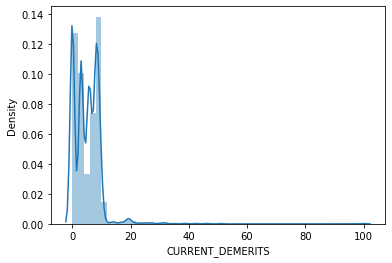

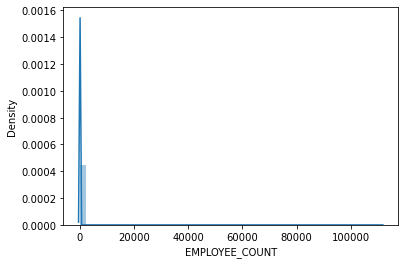

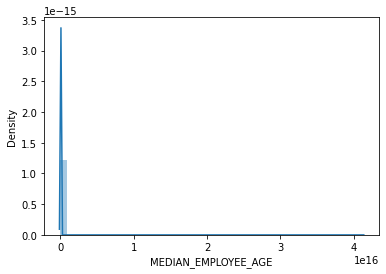

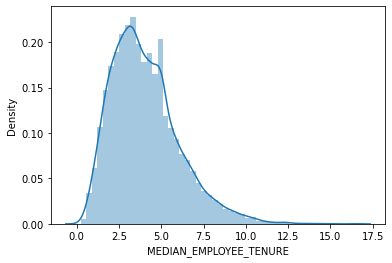

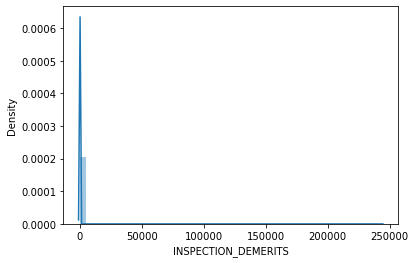

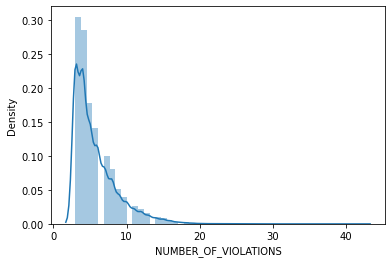

In [70]:
# create distplots
%matplotlib inline
sample_features = \
['CURRENT_DEMERITS',
'EMPLOYEE_COUNT',
'MEDIAN_EMPLOYEE_AGE',
'MEDIAN_EMPLOYEE_TENURE',
'INSPECTION_DEMERITS',
'NUMBER_OF_VIOLATIONS']
for column in sample_features:
    plt.figure()             
    sns.distplot(dataset[column])

Text(0, 0.5, 'Count')

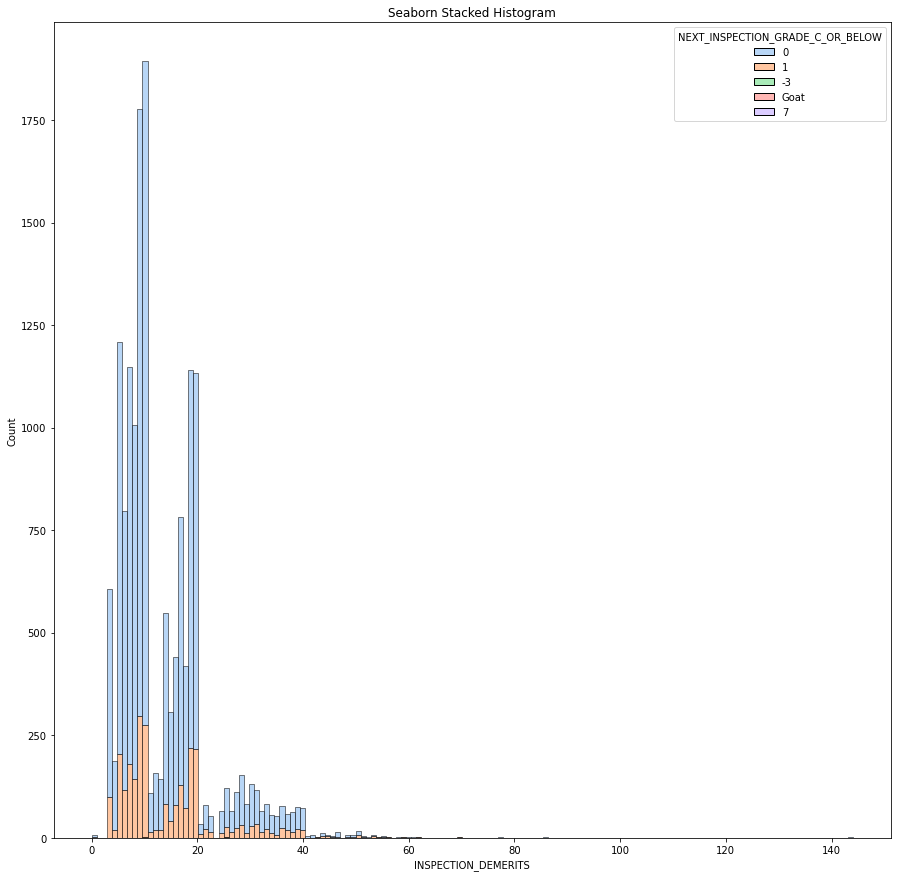

In [58]:
#HISTOGRAM of inspection demerits 
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(1,1,1)

sns.histplot(data=dataset, ax=ax, stat="count", multiple="stack",
             x="INSPECTION_DEMERITS", kde=False,
             palette="pastel", hue="NEXT_INSPECTION_GRADE_C_OR_BELOW",
             element="bars", legend=True)
ax.set_title("Seaborn Stacked Histogram")
ax.set_xlabel("INSPECTION_DEMERITS")
ax.set_ylabel("Count")

In [ ]:
#HISTOGRAM of CURRENT_DEMERITS

Text(0, 0.5, 'Count')

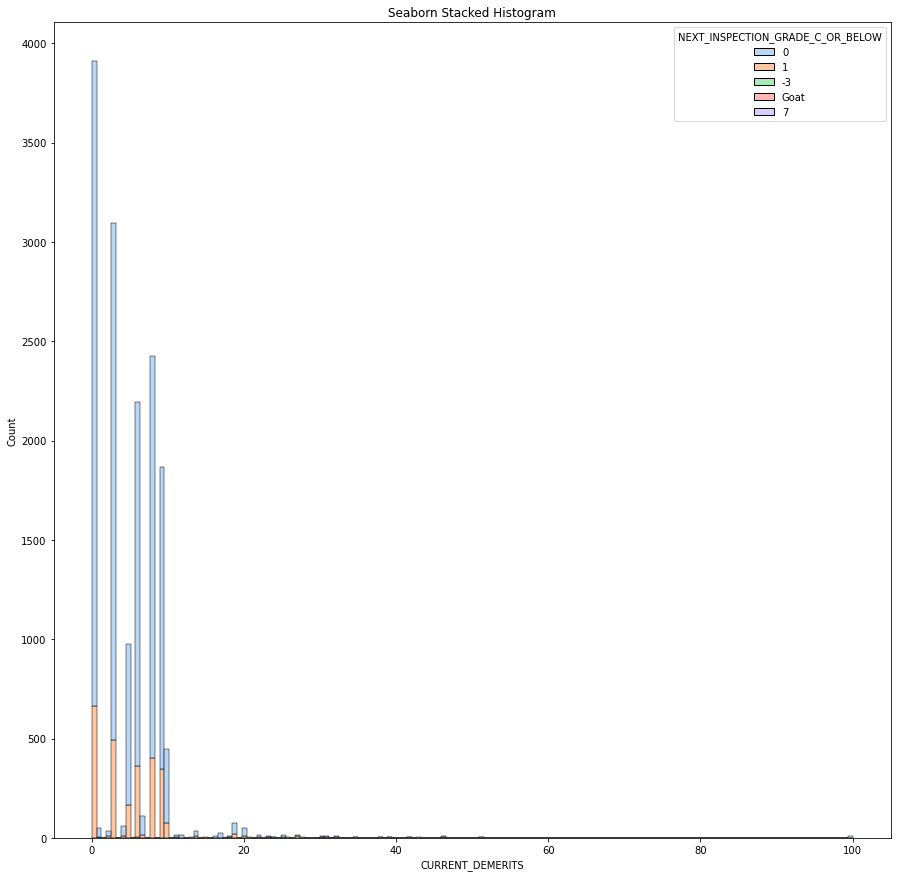

In [59]:
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(1,1,1)

sns.histplot(data=dataset, ax=ax, stat="count", multiple="stack",
             x="CURRENT_DEMERITS", kde=False,
             palette="pastel", hue="NEXT_INSPECTION_GRADE_C_OR_BELOW",
             element="bars", legend=True)
ax.set_title("Seaborn Stacked Histogram")
ax.set_xlabel("CURRENT_DEMERITS")
ax.set_ylabel("Count")

In [ ]:
#We also do pairplots below  for certain features

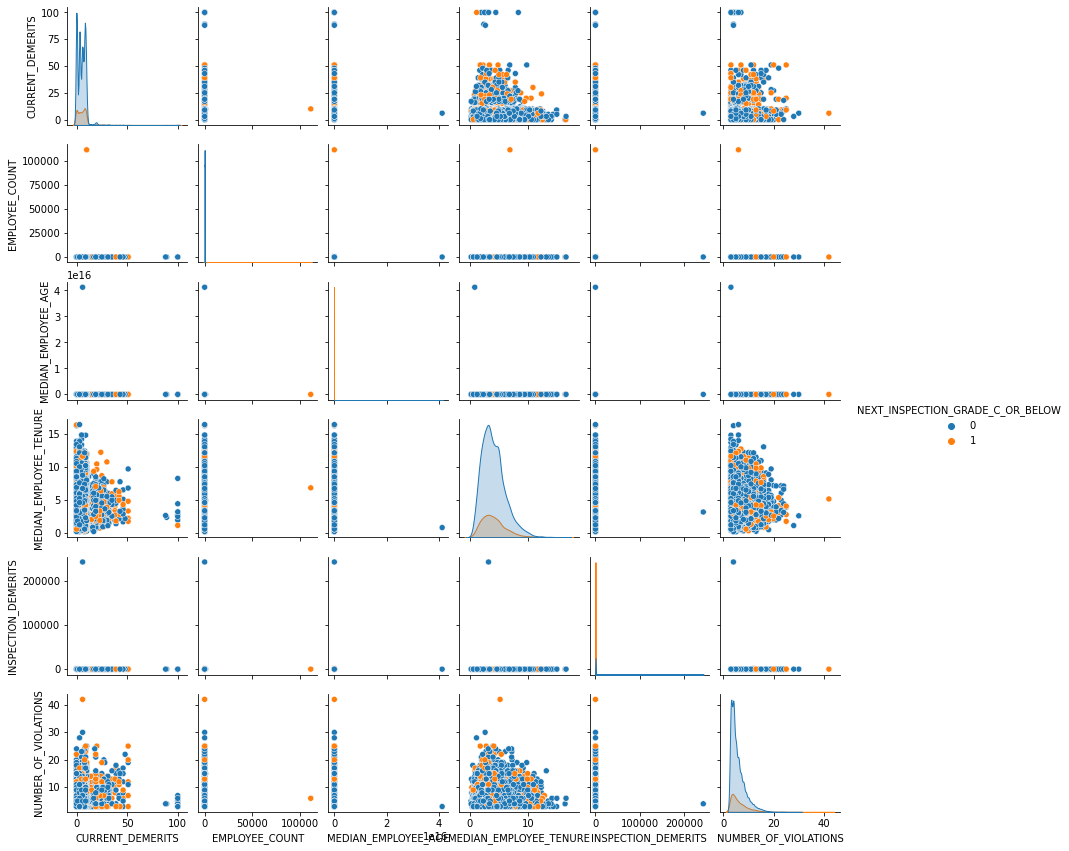

In [29]:
sample_features = \
['CURRENT_DEMERITS',
'EMPLOYEE_COUNT',
'MEDIAN_EMPLOYEE_AGE',
'MEDIAN_EMPLOYEE_TENURE',
'INSPECTION_DEMERITS',
'NUMBER_OF_VIOLATIONS',
'NEXT_INSPECTION_GRADE_C_OR_BELOW']
sns.pairplot(data=dataset[sample_features], hue='NEXT_INSPECTION_GRADE_C_OR_BELOW', height=2)

<AxesSubplot:>

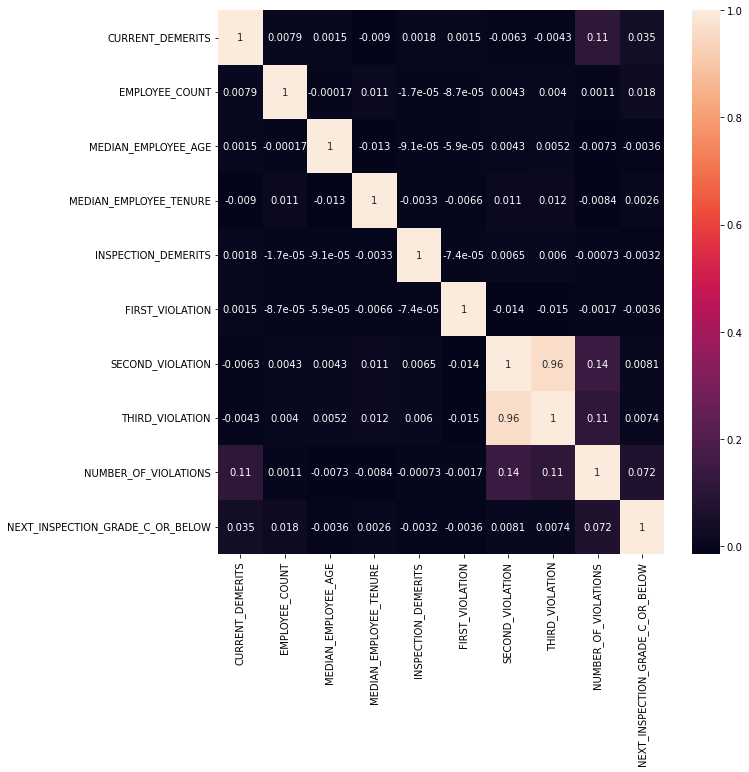

In [12]:
#A heatmap can be used to visualize the correlation coefficients of continuous variables 
fig = plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)


#comments no correlation
above plots show little or no correlation between the numeric predictors. so there's no issue of multi collinearity

In [ ]:
Next we do catplot for some variables

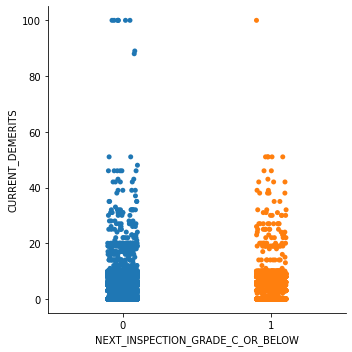

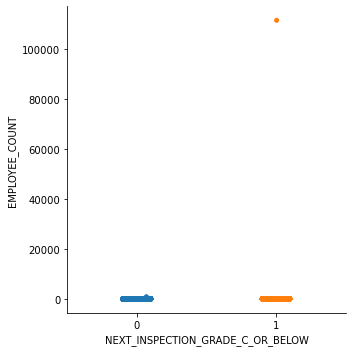

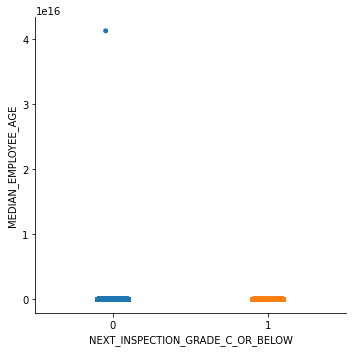

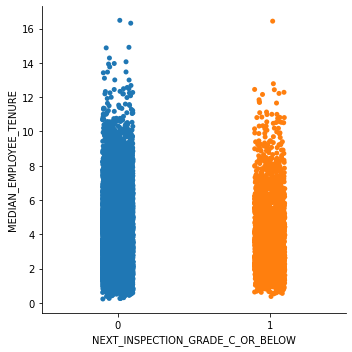

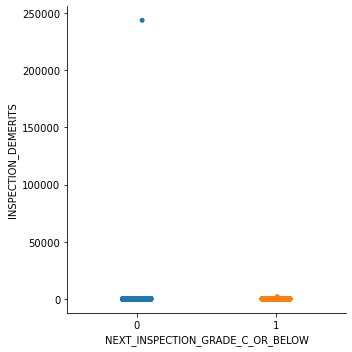

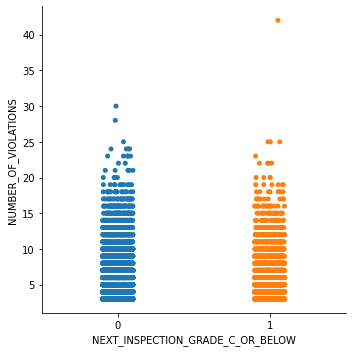

In [21]:
sample_features = \
['CURRENT_DEMERITS',
'EMPLOYEE_COUNT',
'MEDIAN_EMPLOYEE_AGE',
'MEDIAN_EMPLOYEE_TENURE',
'INSPECTION_DEMERITS',
'NUMBER_OF_VIOLATIONS']
for i in sample_features:
    sns.catplot(x='NEXT_INSPECTION_GRADE_C_OR_BELOW', y=i, data=dataset)

We can see that the chances improve greatly for an inspection to pass when the employee tenure is greater than 12.

In [23]:
dataset_categorical_features = dataset.select_dtypes(include='object')
dataset_categorical_features.columns

Index(['RESTAURANT_CATEGORY', 'CURRENT_GRADE', 'INSPECTION_TIME',
       'INSPECTION_TYPE', 'RECORD_UPDATED', 'FIRST_VIOLATION_TYPE',
       'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE'],
      dtype='object')

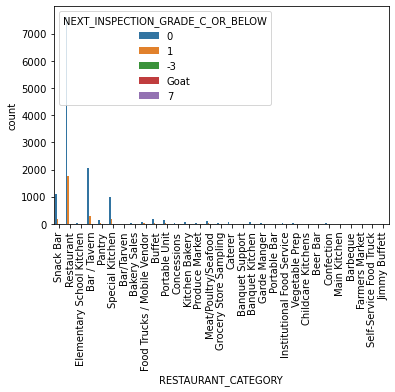

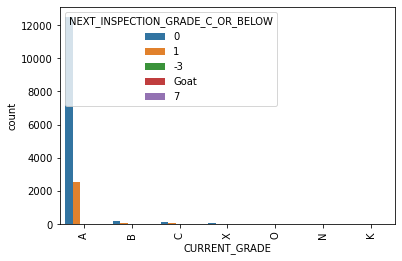

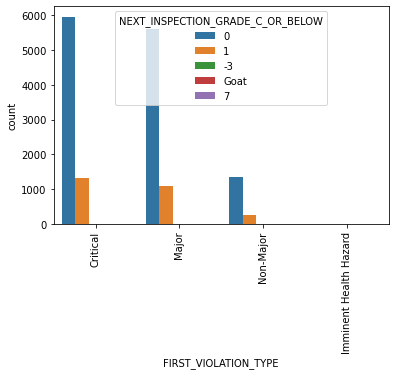

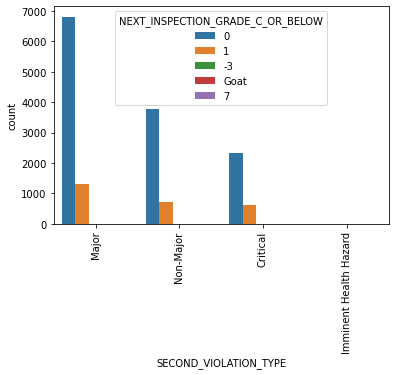

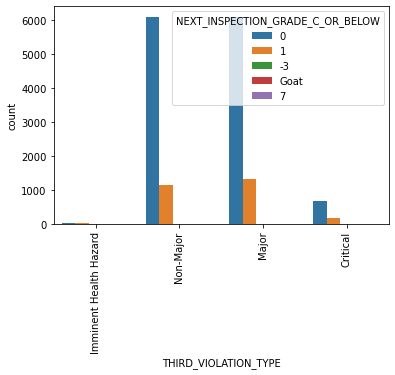

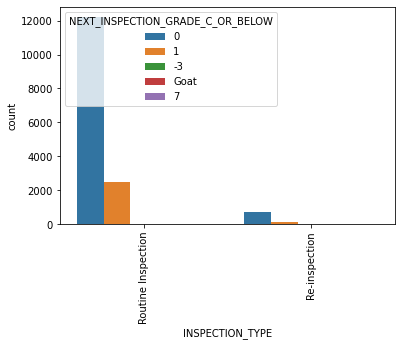

In [55]:
sample_features = \
['RESTAURANT_CATEGORY', 'CURRENT_GRADE', 'FIRST_VIOLATION_TYPE',
       'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE','INSPECTION_TYPE']
for i in sample_features:
    sns.countplot(x=i, hue='NEXT_INSPECTION_GRADE_C_OR_BELOW', data=dataset)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show()

In [ ]:
# checking Restaurant Categories which have most violations

Restaurant Categories Having Most number of violations :
RESTAURANT_CATEGORY
Restaurant                     9360
Bar / Tavern                   2342
Snack Bar                      1273
Special Kitchen                1148
Buffet                          221
Portable Unit                   196
Pantry                          165
Meat/Poultry/Seafood            136
Food Trucks / Mobile Vendor      98
Caterer                          70
Name: NUMBER_OF_VIOLATIONS, dtype: int64


<AxesSubplot:xlabel='count', ylabel='RESTAURANT_CATEGORY'>

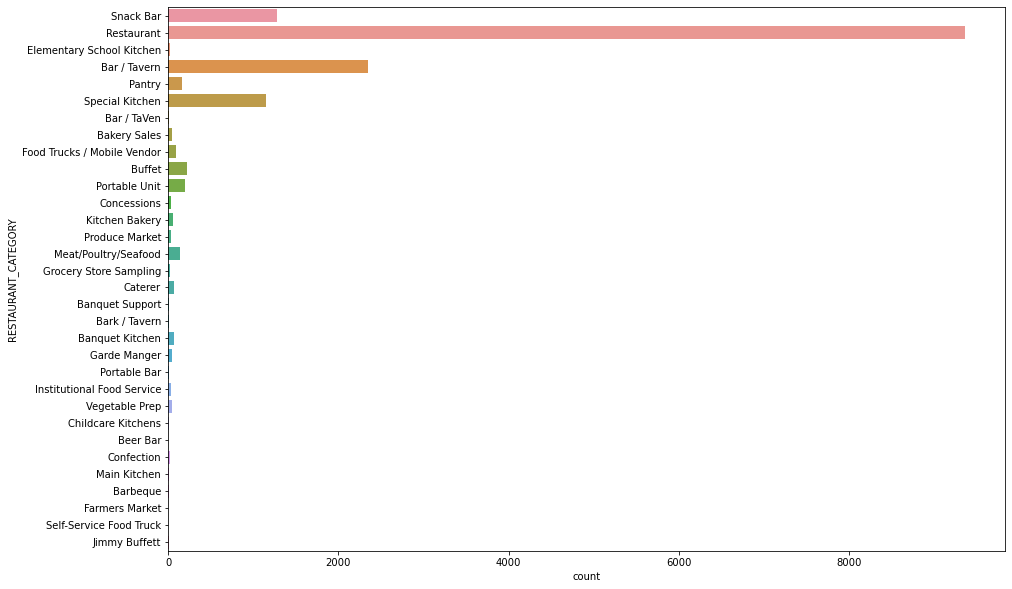

In [151]:
print ("Restaurant Categories Having Most number of violations :\n{0}".format(dataset.groupby('RESTAURANT_CATEGORY')["NUMBER_OF_VIOLATIONS"].count().sort_values(ascending=False).head(10)))
plt.figure(figsize=(15,10))
sns.countplot(y=dataset["RESTAURANT_CATEGORY"])

Looking at the above graph , top 5 categories which recieve most violations are

restaurant
Bar / Tavern
Snack Bar
Special Kitchen
Buffet



#comments

There was little or no correlation betwen the continous variables, so there would be no issue of multi-cllinearity among our variables to be used in fitting the data

Current demerits is skewed with most of the values between 0 to 10. Very few data has current demerits above 20.

Employee count is also skewed as well with more values falling below 40. Most of the employee count per restaurant is actually below 10.

The median employee is fairly normally distributed with most of the employees having an age around 30 with few lying above 45.

Median Employee tenure is also skewed with most of the median employee tenure less than 5. Very few of the restaurants had an employee tenure above 10.

Inspection demerit was distributed fairly across with most restaurants falling above 60 inspection demerits.

Most restaurants in this project had number of violations above 18.

#### CLASS IMBALANCE CHECK

In [84]:
dataset['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts(dropna=False)

0    12867
1     2646
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: int64

<AxesSubplot:ylabel='NEXT_INSPECTION_GRADE_C_OR_BELOW'>

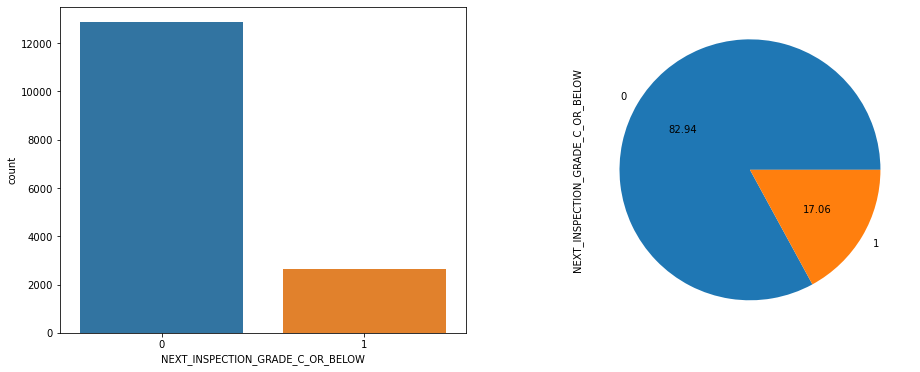

In [85]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(dataset['NEXT_INSPECTION_GRADE_C_OR_BELOW'])
plt.subplot(1,2,2)
dataset['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts().plot(kind='pie',autopct="%.2f")

we have class imbalance issue
About 17% will go for C grade in next inspection and 83% are fine for next inspection

In [ ]:
to tackle imbalance, we use the imbalanced-learn library

In [7]:
#pip install imblearn

In [8]:
from imblearn.under_sampling import RandomUnderSampler
features = [ 'CURRENT_DEMERITS', 'CURRENT_GRADE', 'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE',
       'MEDIAN_EMPLOYEE_TENURE', 'INSPECTION_TYPE', 'INSPECTION_DEMERITS',
       'FIRST_VIOLATION_TYPE', 'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE',
       'NUMBER_OF_VIOLATIONS','INSPECTION_HOURS']

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_resampled, y_resampled = undersample.fit_resample(dataset[features], dataset['NEXT_INSPECTION_GRADE_C_OR_BELOW'])

y_resampled.value_counts()

0    2646
1    2646
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: int64

In [9]:
X_resampled.head()

,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,INSPECTION_HOURS
0,9.0,A,21.0,24.815234,5.127116,Routine Inspection,9.0,Major,Major,Major,5.0,After 12
1,3.0,A,10.0,28.067661,3.814677,Routine Inspection,8.0,Major,Major,Non-Major,4.0,After 12
2,5.0,A,21.0,26.696085,3.554622,Routine Inspection,17.0,Critical,Major,Major,5.0,Before 12
3,8.0,A,32.0,28.931832,4.054726,Re-inspection,17.0,Critical,Critical,Major,5.0,Before 12
4,3.0,A,3.0,34.279262,2.855675,Routine Inspection,5.0,Major,Non-Major,Non-Major,3.0,After 12


In [ ]:
#Data splitting

In [10]:
train_df=pd.concat([X_resampled, y_resampled], axis=1)
train_df = train_df.sample(frac=1,random_state=42)
X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]

In [11]:

dataset_numerical_features = X_train.select_dtypes(exclude='object')
dataset_categorical_features = X_train.select_dtypes(include='object')

In [12]:
categorical_features = dataset_categorical_features.columns
categorical_features

Index(['CURRENT_GRADE', 'INSPECTION_TYPE', 'FIRST_VIOLATION_TYPE',
       'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE', 'INSPECTION_HOURS'],
      dtype='object')

In [13]:

numerical_features = dataset_numerical_features.columns
numerical_features

Index(['CURRENT_DEMERITS', 'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE',
       'MEDIAN_EMPLOYEE_TENURE', 'INSPECTION_DEMERITS',
       'NUMBER_OF_VIOLATIONS'],
      dtype='object')

#### One hot encoding and Feature scaling

In [14]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler

In [ ]:
we perform one hot encoding for categorical variables

In [ ]:
We need to perform Feature Scaling when we are dealing with Gradient Descent Based algorithms
(Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM)
as these are very sensitive to the range of the data points.

In [15]:
from sklearn.compose import ColumnTransformer

CT=ColumnTransformer(transformers=[('ohe',OneHotEncoder(handle_unknown='ignore',sparse=False),
                                    categorical_features),
                                    ('scaler',StandardScaler(),numerical_features),
                     ],remainder='passthrough')

In [16]:
X_train = CT.fit_transform(X_train)
X_test = CT.transform(test_df)

### MODELS

In [ ]:
First i create a function for evaluating the performance of our models and
creating a confusion matrix

In [17]:
def Performance_Evaluation(classifier, X_test, y_test, label=None):
    
    predictions = classifier.predict(X_test)
    acc = accuracy_score(y_test,predictions)
    precision = precision_score(predictions,y_test,average='micro')
    recall_Score = recall_score(predictions,y_test, average='micro')
    f1 = f1_score(predictions,y_test, average='micro')
    
    from sklearn.metrics import classification_report as rep

    print('Classification Report is Shown Below')
    print('')
    report = rep(predictions,y_test)
    print(report)
    
def Performance_Evaluation_DeepModels(classifier, X_test, y_test, label=None):
    
    predictions = classifier.predict(X_test)
    
    
    predictions = np.argmax(predictions, axis=1)
    predictions = np.argmax(predictions, axis=1)
    acc = accuracy_score(y_test,predictions)
    precision = precision_score(predictions,y_test,average='micro')
    recall_Score = recall_score(predictions,y_test, average='micro')
    f1 = f1_score(predictions,y_test, average='micro')
    
    from sklearn.metrics import classification_report as rep

    print('Classification Report is Shown Below')
    print('')
    report = rep(predictions,y_test)
    print(report)
    
def plot_confusionMatrix(predictions,real):
    
    cm = confusion_matrix(predictions,real)
    displayy = ConfusionMatrixDisplay(cm)

    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)

    displayy.plot(ax=ax1)

#### logistic regression

In [347]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1,0.1,1,10]}

clf = LogisticRegression(random_state=42)
grid_LR = GridSearchCV(clf, param_grid, cv=3, verbose = 1)
  
# fitting the model for grid search
grid_LR.fit(X_train, y_train)

print("The best parameters are: ", grid_LR.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
The best parameters are:  {'C': 10}


In [ ]:
#The best parameter of C to use is 10

In [348]:
best_params = grid_LR.best_params_
best_LR = LogisticRegression(random_state=42).set_params(**best_params)

best_LR = best_LR.fit(X_train,y_train)

In [349]:
Performance_Evaluation(best_LR, X_train, y_train, label='Logistic Regression')

Classification Report is Shown Below

              precision    recall  f1-score   support

           0       0.69      0.53      0.60      3409
           1       0.40      0.56      0.47      1883

    accuracy                           0.54      5292
   macro avg       0.54      0.55      0.53      5292
weighted avg       0.58      0.54      0.55      5292



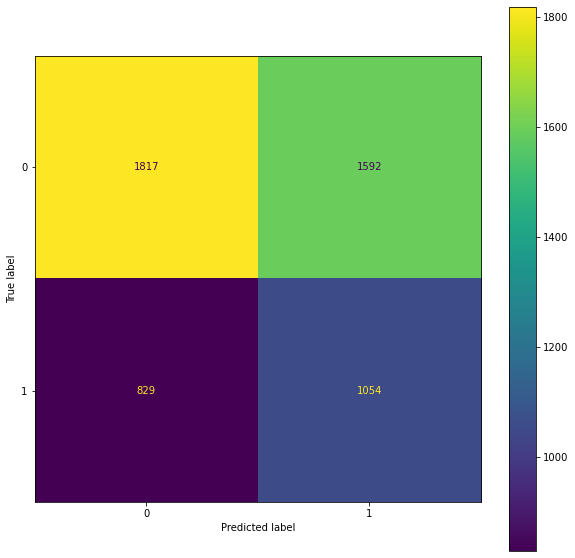

In [351]:
predictions =best_LR.predict(X_train)

plot_confusionMatrix(predictions,y_train)

#### Decision Trees

In [352]:
# defining parameter range
param_grid = {'splitter': ['best','random'], 
              'max_depth': list(range(1, 10, 1)),
              'min_samples_split': list(range(2, 15, 2))}

clf = DecisionTreeClassifier(random_state=42)
grid_DT = GridSearchCV(clf, param_grid, cv=3, verbose = 1)
  
# fitting the model for grid search
grid_DT.fit(X_train, y_train)

print("The best parameters are: ", grid_DT.best_params_)

Fitting 3 folds for each of 126 candidates, totalling 378 fits
The best parameters are:  {'max_depth': 3, 'min_samples_split': 2, 'splitter': 'random'}


In [ ]:
# The best parameters are to use are: 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'random'

In [356]:
best_params = grid_DT.best_params_
best_DT = DecisionTreeClassifier(random_state=42).set_params(**best_params)

best_DT = best_DT.fit(X_train,y_train)

In [357]:
Performance_Evaluation(best_DT, X_train, y_train, label='Decision Trees')

Classification Report is Shown Below

              precision    recall  f1-score   support

           0       0.81      0.52      0.64      4111
           1       0.26      0.58      0.36      1181

    accuracy                           0.54      5292
   macro avg       0.54      0.55      0.50      5292
weighted avg       0.69      0.54      0.57      5292



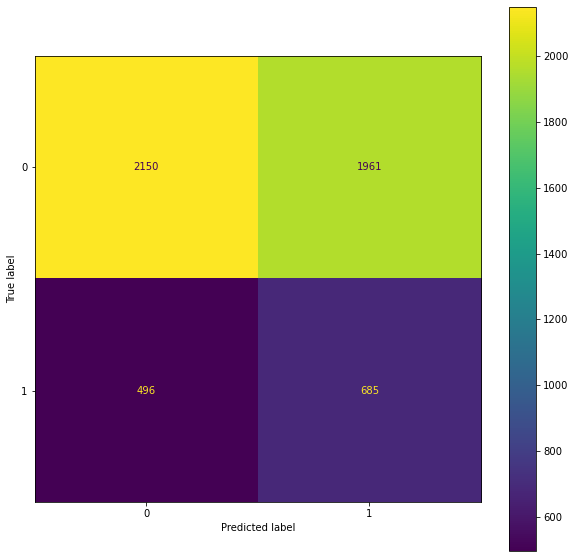

In [354]:
predictions =best_DT.predict(X_train)

plot_confusionMatrix(predictions,y_train)

#### Random Forest Classifier

In [19]:
# defining parameter range
param_grid = {'max_depth': list(range(1,10,1)), 
              'n_estimators': list(range(100,1500,200)),
              'min_samples_split': list(range(2, 12, 2))}

clf = RandomForestClassifier(random_state=42)
grid_RF = GridSearchCV(clf, param_grid, cv=3, verbose = 1)
  
# fitting the model for grid search
grid_RF.fit(X_train, y_train)

print("The best parameters are: ", grid_RF.best_params_)

Fitting 3 folds for each of 315 candidates, totalling 945 fits


In [20]:
best_params = grid_RF.best_params_
best_RF = RandomForestClassifier(random_state=42).set_params(**best_params)

best_RF = best_RF.fit(X_train,y_train)

In [21]:
Performance_Evaluation(best_RF, X_train, y_train, label='Random Forest')

Classification Report is Shown Below

              precision    recall  f1-score   support

           0       0.75      0.58      0.65      3412
           1       0.46      0.65      0.54      1880

    accuracy                           0.60      5292
   macro avg       0.60      0.61      0.59      5292
weighted avg       0.65      0.60      0.61      5292



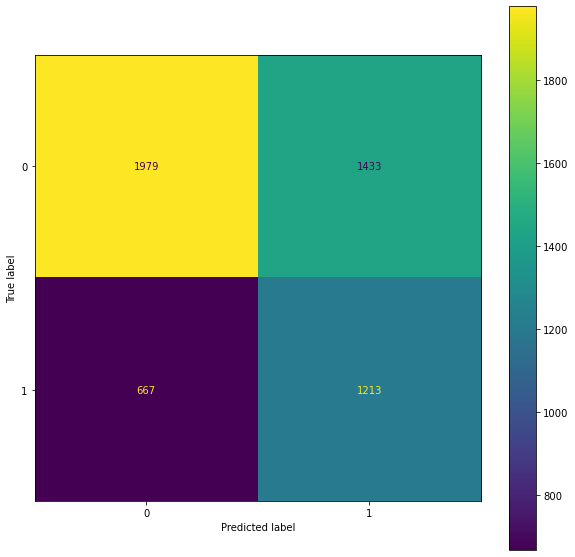

In [22]:
predictions =best_RF.predict(X_train)

plot_confusionMatrix(predictions,y_train)



In [ ]:
#Finding the important features to the model using random forest

<BarContainer object of 28 artists>

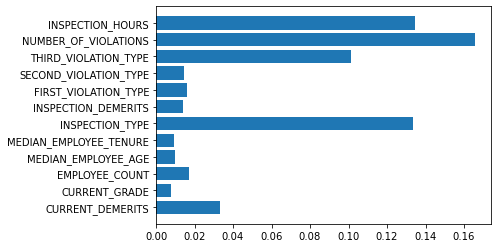

In [84]:
plt.barh(features, best_RF.feature_importances_)

#### ANN

In [23]:
def build_ANN(unit):
  # creating the layers of the NN
    classifier = Sequential()
    
    classifier.add(Dense(units=unit, input_dim=X_train.shape[1], activation='relu'))
    classifier.add(Dense(units=unit, activation='relu'))
    classifier.add(Dense(units=2,activation='softmax'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

from keras.wrappers.scikit_learn import KerasClassifier

In [25]:
from sklearn.model_selection import GridSearchCV


param_grid = {'epochs': [20,30,50], 
              'batch_size': [8,16],
             'unit':[5, 10, 20]} 

ohe2 = OneHotEncoder()

target = train_df['NEXT_INSPECTION_GRADE_C_OR_BELOW']

target = np.array(target)
target = target.reshape(-1,1)

ohe2 = ohe2.fit_transform(target)


y_train_ohe = pd.DataFrame(ohe2.toarray())

model = KerasClassifier(build_fn=build_ANN)

grid_ANN = GridSearchCV(model, param_grid, cv=3, verbose = 0)
  
# fitting the model for grid search
grid_ANN.fit(X_train, y_train_ohe)

print("The best parameters are: ", grid_ANN.best_params_)

2022-10-17 13:57:20.117618: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-17 13:57:20.343241: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
441/441 [==============================] - 11s 568us/step - loss: 0.6966 - accuracy: 0.5135
Epoch 2/20
441/441 [==============================] - 0s 559us/step - loss: 0.6933 - accuracy: 0.5090
Epoch 3/20
441/441 [==============================] - 0s 558us/step - loss: 0.6918 - accuracy: 0.5095
Epoch 4/20
441/441 [==============================] - 0s 555us/step - loss: 0.6907 - accuracy: 0.5220
Epoch 5/20
441/441 [==============================] - 0s 645us/step - loss: 0.6882 - accuracy: 0.5374
Epoch 6/20
441/441 [==============================] - 0s 555us/step - loss: 0.6879 - accuracy: 0.5323
Epoch 7/20
441/441 [==============================] - 0s 547us/step - loss: 0.6866 - accuracy: 0.5417
Epoch 8/20
441/441 [==============================] - 0s 559us/step - loss: 0.6842 - accuracy: 0.5526
Epoch 9/20
441/441 [==============================] - 0s 556us/step - loss: 0.6859 - accuracy: 0.5334
Epoch 10/20
441/441 [==============================] - 0s 550us/step - loss: 0.68

In [ ]:
The best parameters are:  {'batch_size': 16, 'epochs': 20, 'unit': 20}

In [ ]:
#Now we build our model

In [63]:
from tensorflow.keras import layers

In [66]:
ANN_classifier = Sequential()

ANN_classifier.add(Dense(units=5, input_dim=X_train.shape[1], activation='relu'))

ANN_classifier.add(Dense(units=5, activation='relu'))

 
ANN_classifier.add(Dense(units=2,activation='softmax'))
 
ANN_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ANN_classifier.summary()
 

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_191 (Dense)            (None, 5)                 145       
_________________________________________________________________
dense_192 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_193 (Dense)            (None, 2)                 12        
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#The best parameters derived earlier are used to train the model below

In [57]:
ANN_classifier.fit(X_train, y_train_ohe ,batch_size = 16, epochs = 20, verbose=1)

Epoch 1/20
331/331 [==============================] - 1s 628us/step - loss: 0.7276 - accuracy: 0.4915
Epoch 2/20
331/331 [==============================] - 0s 599us/step - loss: 0.6929 - accuracy: 0.5142
Epoch 3/20
331/331 [==============================] - 0s 586us/step - loss: 0.6898 - accuracy: 0.5473
Epoch 4/20
331/331 [==============================] - 0s 638us/step - loss: 0.6892 - accuracy: 0.5414
Epoch 5/20
331/331 [==============================] - 0s 618us/step - loss: 0.6883 - accuracy: 0.5402
Epoch 6/20
331/331 [==============================] - 0s 597us/step - loss: 0.6882 - accuracy: 0.5414
Epoch 7/20
331/331 [==============================] - 0s 648us/step - loss: 0.6866 - accuracy: 0.5467
Epoch 8/20
331/331 [==============================] - 0s 642us/step - loss: 0.6864 - accuracy: 0.5508
Epoch 9/20
331/331 [==============================] - 0s 609us/step - loss: 0.6839 - accuracy: 0.5633
Epoch 10/20
331/331 [==============================] - 0s 626us/step - loss: 0.686

In [3]:
#evaluation metrics from confusion plot below
print('Accuracy: %.2f' % ((2965/5292)*100))
print('sensitivity: %.2f' % ((1101/2646)*100))

Accuracy: 56.03
sensitivity: 41.61


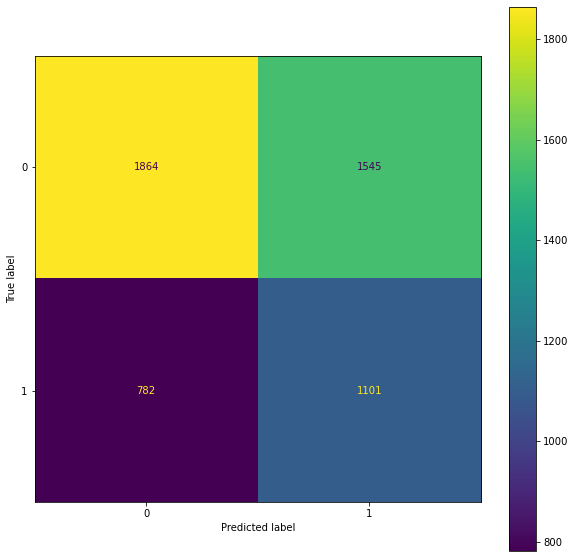

In [59]:
predictions =ANN_classifier.predict(X_train)

predictions = np.argmax(predictions, axis=1)


cm = confusion_matrix(predictions,y_train)
displayy = ConfusionMatrixDisplay(cm)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

displayy.plot(ax=ax1)




#### Prediction on test data using the best model 

In [ ]:
# Best Model: Decision Tree Classifier

In [ ]:
X_test_probabilities = best_DT.predict_proba(X_test)

predictions = best_DT.predict(X_test)

In [ ]:
output = pd.DataFrame(X_test_probabilities, columns=['Probabily of 0','Probabily of 1'])
output['Restaurant Serial Number'] = RESTAURANT_SERIAL_NUMBER
output['Classification Result'] = predictions

In [ ]:
output = output.reindex(columns=['Restaurant Serial Number','Probabily of 0','Probabily of 1','Classification Result'])

In [ ]:
# writing test data to csv

In [ ]:
output.to_csv('Output.csv')

# SUMMARY 

The findings from this project are enumerated below:

After exploratory analysis, there was not much relationship among the predictor variables and also between the predictor variable and the responses. Hence there was no issue of multicollinearity

Next, the dataset was highly imbalanced hence the random undersampling method of the majority class was used to balance the data for further analysis to ensure accuracy in our analysis and prevent bias towards the majority classs.

Using the feature importance of random forest, The top 5 features in determining our response varia current grade , second violation type , third violation type and number of violations and time of inspection as the variables that may be significant in predicting next inpection grade c or below.

It was noticed that the variable that was most significant in determining whether a restaurant’s next inspection grade would be C or below was their most recent number of violations. This is not surprising since a restaurant that had a high previous violation may take measures to mitigate those violations before any other inspection is done again especially if they care about their business.

Furthermore, most of the models selected the time of inspection and third violation type to be crucial in determining the response. That is whether an inspection was done in the morning or not seemed to influence the outcome of the inspection. I believe this could be thought of in two ways, in the mornings , the inspectors may be more alert and stricter or they could be less forgiving as the day goes by. This brings to mind the idea of subjectivity in the asssignment of the grades by the inspectors.

The decision tree model was the model that had a fairly high accuracy, AUC and sensitivity than the other models.

The predictions on the test data are saved in the csv file.

Overall, the classification metrics did show that none of the models was very suitable in predicting whether or not a restaurant was going to have a next inspection grade of C or below. 

The Accuracy values of some of the models were high but this could be misleading because of how imbalanced the data was.

Because of the above reasons, I believe a minimally viable product model may not be appropraite for such an analysis.

## Conclusion

Based on my objectives for the study,

Number of violations in previous inspection was the most significant variable in predicting whether or not a restaurant was going to have a next inspection grade of C or below.

The best predictive model was the random forest model.

A minimally viable product model is not appropraite for this analysis.

## Recommendations

From the overall analysis, building a reliable minimally viable product model may not be appropraite for this model mainly because of the highly imbalanced nature of the data towards response class zero. My recommendation to get a better model is to collect more data; preferably a data set that has more of the interest category of the response. That is, we need more observations that have a next inspection grade c or below. This would enable us have more information for better analysis.

Also, despite the fact that all inspectors are trained alike, the subjectivity in assigning these grades may also have an influence on the overall predictiveness of the response. Thus, we could find a model that takes into consideration this subjectivity. In the current model, I did not use much of the information on the inspectors Furthermore, in my opinion the attributes listed below can influence a restaurant’s next inspection grade and hence a dataset that includes these may be more predictive, Whether the inspector has inspected the restaurant before or not.(Inspectors who encountered many violations the first time might be stricter the next time).

The number of inspections by the inspector that day(inspectors may become stricter by the end of day)

Number of violations at the next inspections.

Dollar amount of fines on previous inspection( since these may cause the restaurants to rethink and make changes before the next inspection)

Number of social media reviews on bad food safety practices.( This would compliment the subjectivity of the inspections)

The type of food sold which can be categorised into already processed foods or cooked in store foods. (For instance, a restaurant that only sells drinks may not have high violations like those that cook raw food, hence leading to a better grade )

Number of days since last inspection.( I think the most recent the inspection, the more likely the number of violations would be few and hence the more likely the restaurant might have a good next inspection grade)

Number of inspections done by the restaurant in that year.( I think if the number of routine inspections done in the year is a lot, restaurants might take more precaustions in reducing their violations.)

Also, a measure to account for employee behavior in the data set could also be useful in predicting whether a restaurant might have a good next inspection grade or not.

### References

https://opendataportal-lasvegas.opendata.arcgis.com/datasets/lasvegas::restaurant-inspection-violation-codes/explore

https://keras.io/api/metrics/